In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load data from CSV
file_path = '/content/drive/MyDrive/phase1-DM/SuperStore.csv'
data = pd.read_csv(file_path)

# Set numeric columns manually
numeric_columns = ['Discount', 'Profit', 'Quantity', 'Row.ID', 'Sales', 'Shipping.Cost', 'Year', 'weeknum']

# Initialize dictionary to store analysis attributes
analyse_attrs = {}

for col in numeric_columns:
    # Calculate statistical measures
    attr_name = col
    attr_type = data[col].dtype
    min_val = data[col].min()
    max_val = data[col].max()
    value_range = (min_val, max_val)
    mean_val = data[col].mean()
    median_val = data[col].median()
    mode_val = stats.mode(data[col], nan_policy='omit').mode.item() if stats.mode(data[col], nan_policy='omit').mode.size > 0 else np.nan

    # Calculate outliers using IQR
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)][col].tolist()

    # Store attributes in dictionary
    analyse_attrs[col] = [attr_name, attr_type, value_range, min_val, max_val, mean_val, mode_val, median_val, outliers]

# Convert dictionary to DataFrame and save as CSV
labels = ['attr_name', 'attr_type', 'value_range', 'min_val', 'max_val', 'mean_val', 'mode_val', 'median_val', 'outliers']
analyse_attrs_df = pd.DataFrame.from_dict(analyse_attrs, orient='index', columns=labels)
analyse_attrs_df.to_csv('part1_analyse_attrs.csv', index=False)

# Display the result
analyse_attrs_df



,attr_name,attr_type,value_range,min_val,max_val,mean_val,mode_val,median_val,outliers
Discount,Discount,float64,"(0.0, 0.85)",0.000,0.850,0.142908,0.00,0.00,"[0.6, 0.6, 0.6, 0.65, 0.65, 0.65, 0.6, 0.6, 0...."
Profit,Profit,float64,"(-6599.978, 8399.976)",-6599.978,8399.976,28.611290,0.00,9.18,"[180.7659, 107.7216, 150.984, 100.4255, 97.078..."
Quantity,Quantity,float64,"(1.0, 14.0)",1.000,14.000,3.485712,2.00,3.00,"[10.0, 13.0, 11.0, 14.0, 12.0, 10.0, 10.0, 10...."
Row.ID,Row.ID,int64,"(1, 51290)",1.000,51290.000,25645.500000,1.00,25645.50,[]
Sales,Sales,float64,"(0.0, 22638.0)",0.000,22638.000,246.482548,13.00,84.00,"[1261.0, 947.0, 1101.0, 721.0, 726.0, 763.0, 1..."
Shipping.Cost,Shipping.Cost,float64,"(0.002, 933.57)",0.002,933.570,26.375146,0.35,7.69,"[74.66, 72.45, 89.84, 506.49, 364.76, 105.59, ..."
Year,Year,float64,"(1984.0, 2902.0)",1984.000,2902.000,2053.629397,2014.00,2013.00,"[1984.0, 1985.0, 1985.0, 1984.0, 1984.0, 1984...."
weeknum,weeknum,float64,"(1.0, 111.0)",1.000,111.000,49.383461,107.00,39.00,"[111.0, 107.0, 107.0, 107.0, 107.0, 107.0, 107..."


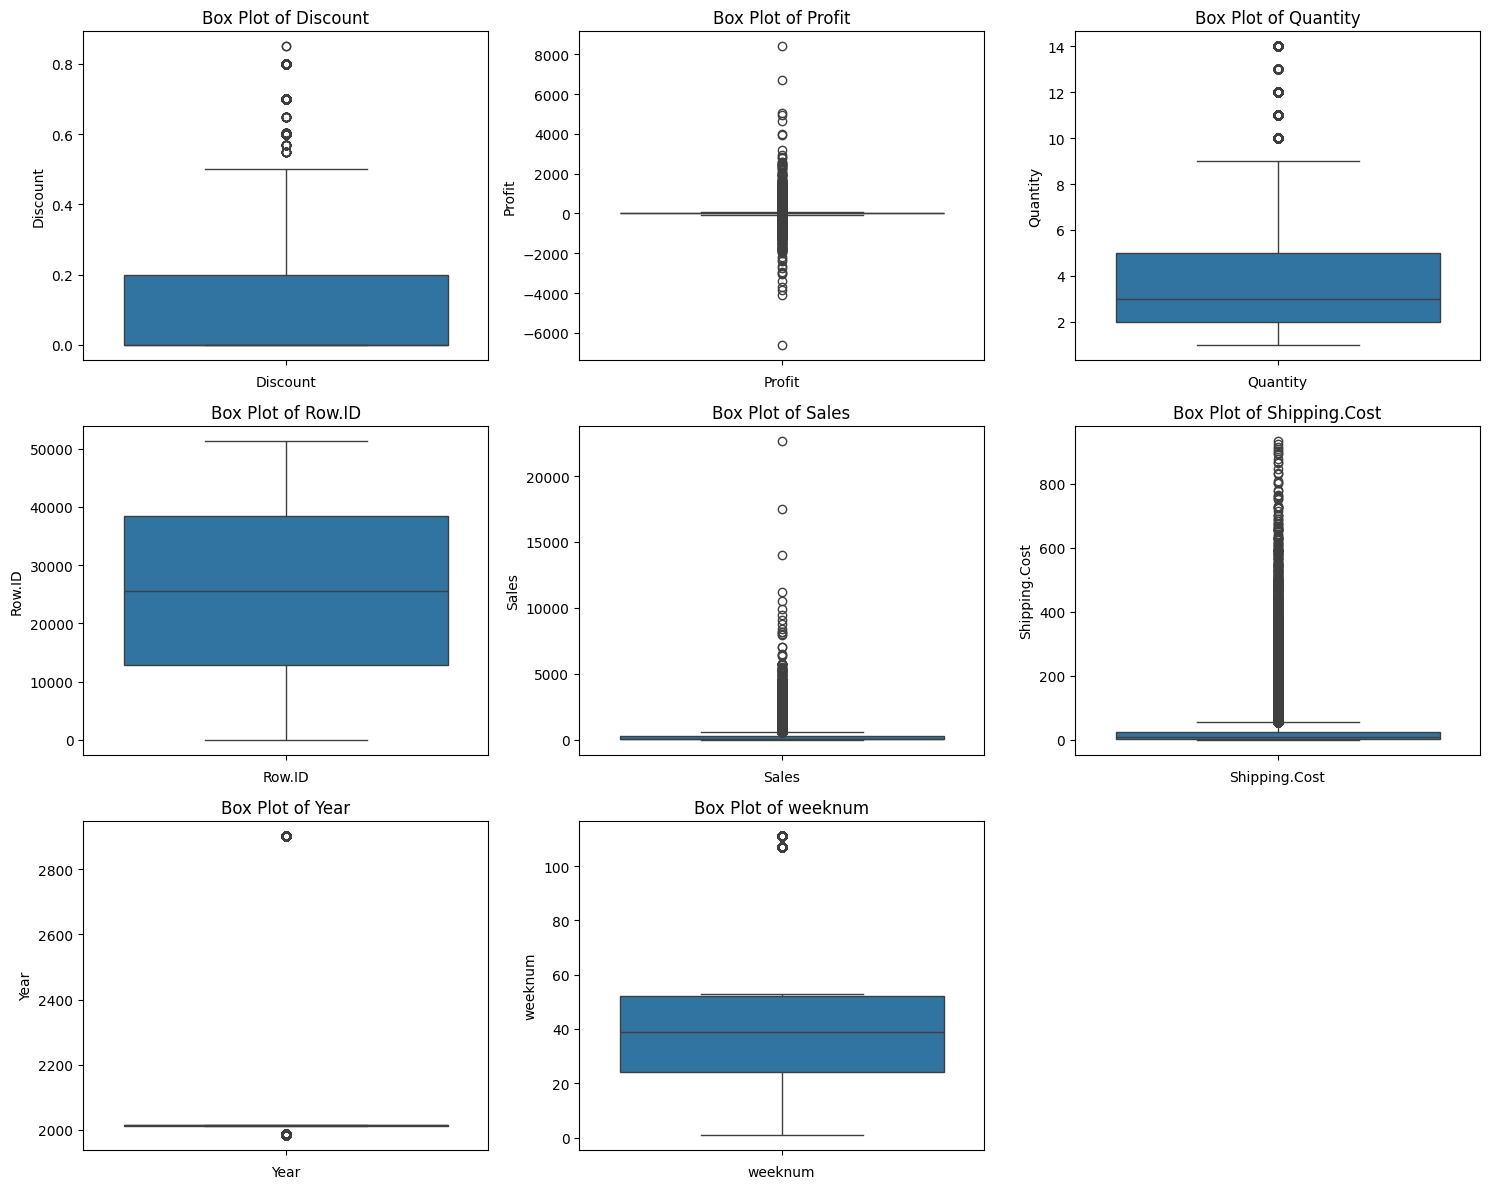

In [3]:
#Detect and plot outliers using Box Plot
plt.figure(figsize=(15, 12))

# Adjust the grid to fit the number of columns
num_cols = len(numeric_columns)
rows = (num_cols // 3) + (num_cols % 3 > 0)  # تعداد ردیف‌ها با تقسیم تعداد ستون‌ها بر ۳ و گرد کردن به بالا

for i, col in enumerate(numeric_columns, 1):
    plt.subplot(rows, 3, i)
    sns.boxplot(data[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

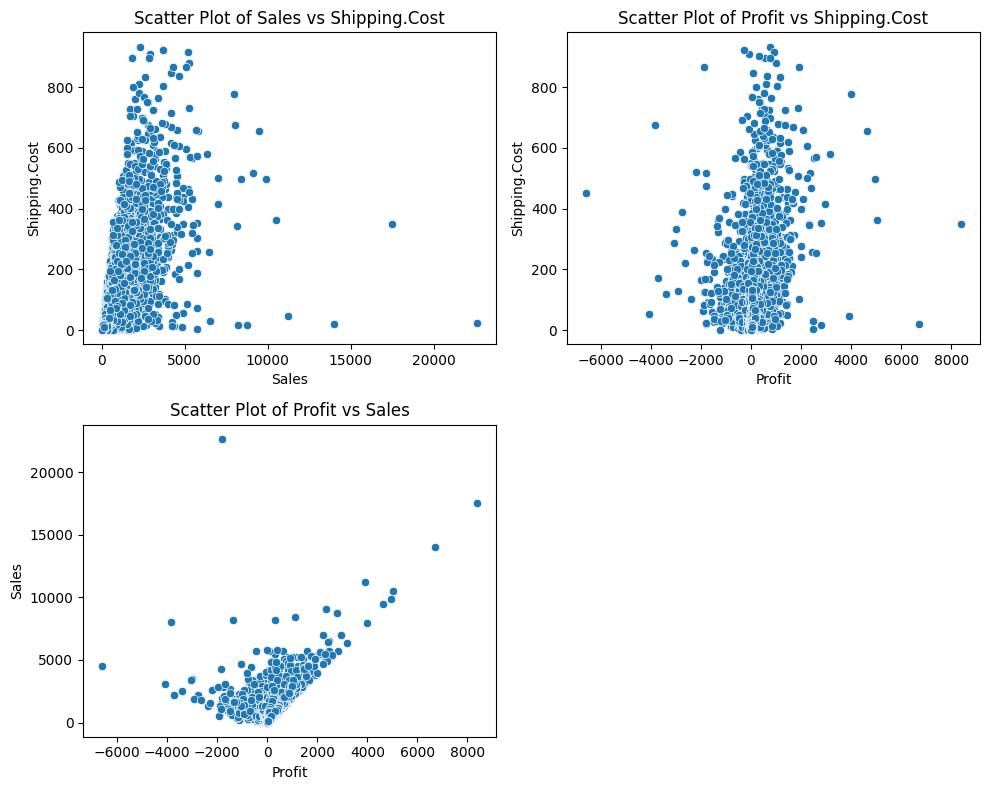